In [ ]:
# Start writing code here...

### OBJETIVE

- What is the overall sales trend?
- What are the top 10 products by sales?
- What are the most selling products?
- Which is the most preferred ship Mode?
- Which are the most profitable category and sub-category?

### Task 1: import libraries and the dataSet 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
plt.style.use('ggplot')


In [ ]:
df = pd.read_excel('superstore_sales.xlsx', engine='openpyxl')
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


### Task 2: Data Auditing and Cleaning

In [ ]:
#Shape of the dataSet
df.shape

(51290, 21)

In [ ]:
#Columns in the dataset
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [ ]:
#Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [ ]:
#Checking missing values
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [ ]:
#Getting a statistical summary
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


### Question 1: What is the overall sales trend?

In [ ]:
#Get the minimun date
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [ ]:
#Get the maximun date
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [ ]:
#Get the month and year from order_date column
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))
df['month_year']

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: month_year, Length: 51290, dtype: object

In [ ]:
#Grouping month and year
df_trend = df.groupby('month_year').sum()['sales'].reset_index()

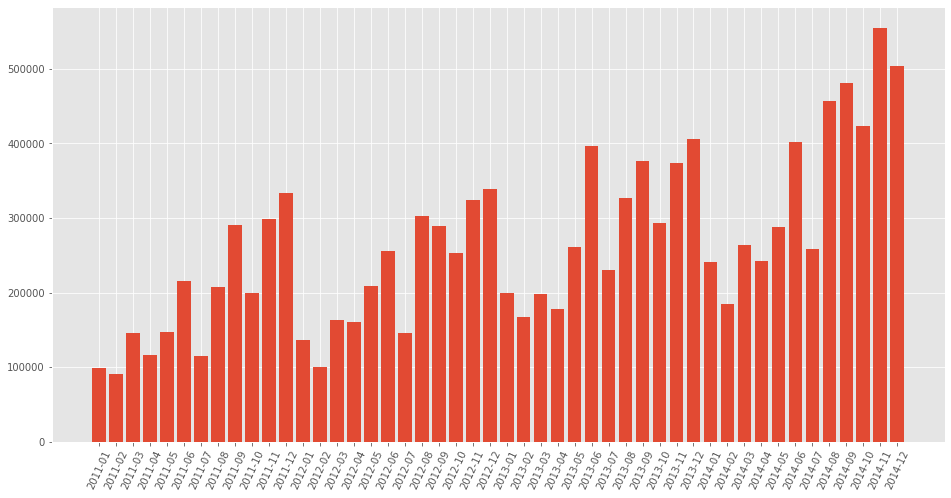

In [ ]:
#Setting the figure size
plt.figure(figsize=(16,8))
plt.bar(df_trend['month_year'], df_trend['sales'])
plt.xticks(rotation='65')
plt.show()

### Question 2: Which are the top 10 products by sales?

In [ ]:
#Grouping product name column
prod_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])

In [ ]:
#Order from highhest to lowest according to sales
prod_sales = prod_sales.sort_values('sales', ascending=False)

In [ ]:
#Top 10 by product by sales
prod_sales = prod_sales[:10].reset_index()
prod_sales

,product_name,sales
0,"Apple Smart Phone, Full Size",86935.7786
1,"Cisco Smart Phone, Full Size",76441.5306
2,"Motorola Smart Phone, Full Size",73156.3030
3,"Nokia Smart Phone, Full Size",71904.5555
4,Canon imageCLASS 2200 Advanced Copier,61599.8240
5,"Hon Executive Leather Armchair, Adjustable",58193.4841
6,"Office Star Executive Leather Armchair, Adjust...",50661.6840
7,"Harbour Creations Executive Leather Armchair, ...",50121.5160
8,"Samsung Smart Phone, Cordless",48653.4600
9,"Nokia Smart Phone, with Caller ID",47877.7857


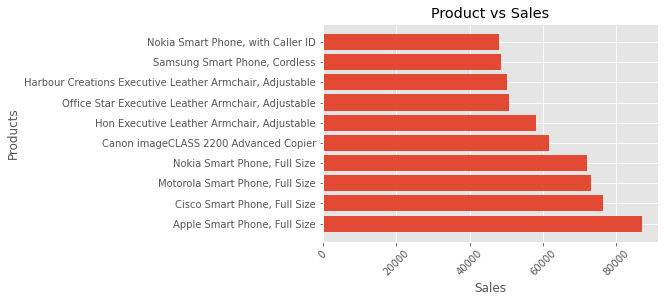

In [ ]:
#Visualization of data by means of a histogram
y = prod_sales['sales']
x = prod_sales['product_name']
plt.barh(x,y)
plt.xticks(rotation='45')
plt.title('Product vs Sales')
plt.xlabel('Sales')
plt.ylabel('Products')
plt.show()

### Question 3: Which are the most selling products?

In [ ]:
#Grouping product name
sell_pro = pd.DataFrame(df.groupby('product_name').sum()['quantity'])

In [ ]:
#Sorting sell_prod
sell_pro = sell_pro.sort_values('quantity', ascending=False).reset_index()
sell_pro

,product_name,quantity
0,Staples,876
1,"Cardinal Index Tab, Clear",337
2,"Eldon File Cart, Single Width",321
3,"Rogers File Cart, Single Width",262
4,"Sanford Pencil Sharpener, Water Color",259
...,...,...
3783,Penpower WorldCard Pro Card Scanner,1
3784,"Bush Saratoga Collection 5-Shelf Bookcase, Han...",1
3785,Boston 1900 Electric Pencil Sharpener,1
3786,Xerox 20,1


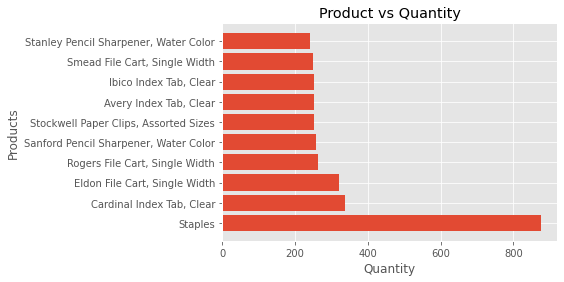

In [ ]:
#Visualization of data by means of a histogram
x = sell_pro['product_name'][:10]
y = sell_pro['quantity'][:10]

plt.barh(x,y)
plt.title('Product vs Quantity')
plt.xlabel('Quantity')
plt.ylabel('Products')
plt.show()

### Question 4: What is the most preferred ship mode?

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


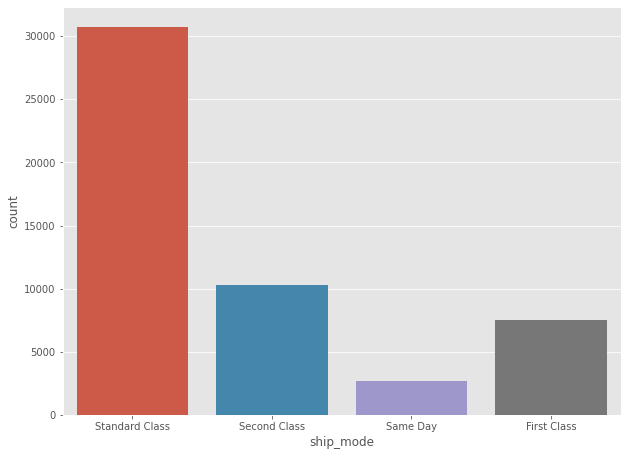

In [ ]:
#Setting figure size
plt.figure(figsize=(10,7.5))

#Plotting ship mode
sns.countplot(df['ship_mode'])
plt.show()

### Question 5: Which are the most profitable category and sub-category?

In [ ]:
#Groupby category and sub category
cat_subcat_profit = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit']).reset_index()
cat_subcat_profit.head()

,category,sub_category,profit
0,Furniture,Bookcases,161924.4195
1,Furniture,Chairs,141973.7975
2,Furniture,Furnishings,46967.4255
3,Furniture,Tables,-64083.3887
4,Office Supplies,Appliances,141680.5894


In [ ]:
#shorting
cat_subcat_profit = cat_subcat_profit.sort_values(['category', 'profit'], ascending=False)
cat_subcat_profit.head(10)

,category,sub_category,profit
14,Technology,Copiers,258567.54818
16,Technology,Phones,216717.00580
13,Technology,Accessories,129626.30620
15,Technology,Machines,58867.87300
4,Office Supplies,Appliances,141680.58940
11,Office Supplies,Storage,108461.48980
6,Office Supplies,Binders,72449.84600
10,Office Supplies,Paper,59207.68270
5,Office Supplies,Art,57953.91090
7,Office Supplies,Envelopes,29601.11630


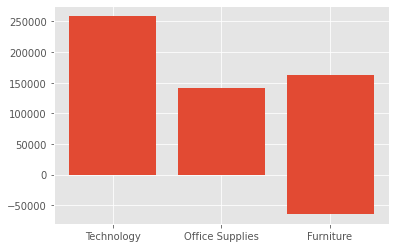

In [ ]:
x = cat_subcat_profit['category']
y = cat_subcat_profit['profit']

plt.bar(x,y)
plt.show()

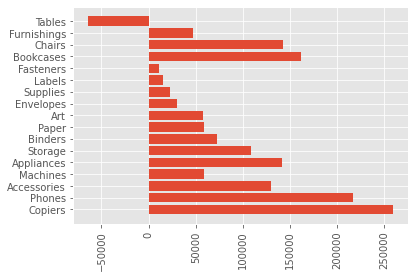

In [ ]:
x = cat_subcat_profit['sub_category']
y = cat_subcat_profit['profit']

plt.barh(x,y)
plt.xticks(rotation='90')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8735fda7-e84a-4693-bf29-dadf426e611e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>